Write a program using tensorflow to calculate : 
    $$y=mx+c$$

### Part 1

1. Read 2 arrays x,y containing floating point values
2. Calculate mean of x & y
3. Calculate variance for x
    $$variance(x)=sum((x-mean(x))^2)$$
4. Calculate covariance of x & y
    $$covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))$$
5. Calculate value of m
    $$m = covariance(x,y)/variance(x)$$
6. Calculate value of c
    $$c = mean(y) -m* mean(x)$$
    

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#Read 2 arrays x,y containing floating point values
with tf.name_scope('input'):
    y=[1.3,2.0,3.6,4.1,5.0]
    x=[1.2,2.8,3.5,4.4,5.5]
    array_x = tf.constant(x, name='x', dtype=tf.float32)         
    array_y = tf.constant(y, name='y', dtype=tf.float32)

with tf.name_scope('means'):
#Calculate mean of x & y
    x_mean = tf.reduce_mean(array_x)
    y_mean = tf.reduce_mean(array_y)

with tf.name_scope('variance_x'):
#Calculate variance for x
    x_var1 = tf.subtract(array_x,x_mean)
    x_var2 = tf.square(x_var1)
    x_variance = tf.reduce_sum(x_var2)

with tf.name_scope('variance_y'):
#Calculate variance for y
    y_var1 = tf.subtract(array_y,y_mean)
    y_var2 = tf.square(y_var1)
    y_variance = tf.reduce_sum(y_var2)

with tf.name_scope('covariance'):
#Calculate  covariance of x & y
    covar1 = tf.multiply(x_var1,y_var1)
    covar2 = tf.reduce_sum(covar1)
    covariance = tf.divide(covar2,4)

with tf.name_scope('slope'):
    #Calculate value of m
    m=tf.divide(covariance,x_variance)

with tf.name_scope('constant'):
    #Calculate value of c
    c1=tf.multiply(m,x_mean)
    c=tf.subtract(y_mean,c1)

with tf.Session() as sess6:
    writer = tf.summary.FileWriter("/tmp/tboard/mx1", sess6.graph)
    print("MEAN of X\t:\t",sess6.run(x_mean))
    print("MEAN of Y\t:\t",sess6.run(y_mean))
    print("VARIANCE of X\t:\t",sess6.run(x_variance))
    print("VARIANCE of Y\t:\t",sess6.run(y_variance))
    print("COVRIANCE of X&Y:\t",sess6.run(covariance))
    print("SLOPE\t\t:\t",sess6.run(m))
    print("INTERCEPT\t:\t",sess6.run(c))
    writer.close()

MEAN of X	:	 3.48
MEAN of Y	:	 3.2
VARIANCE of X	:	 10.588
VARIANCE of Y	:	 9.26
COVRIANCE of X&Y:	 2.405
SLOPE		:	 0.227144
INTERCEPT	:	 2.40954


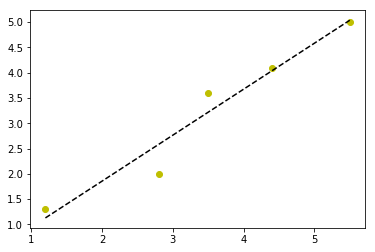

In [31]:
#Plot graph for actual values against predicted value

array_x = np.asarray(x)
array_y = np.asarray(y)

Fit = np.polyfit(array_x,array_y,1)
funFit = np.poly1d(Fit)

plt.plot(array_x,array_y,"yo",array_x,funFit(array_x),"--k")
plt.show()




In [32]:
#Calculate root mean square error.

with tf.name_scope("Root_Mean_Square_error"):    
    rmse= tf.sqrt(tf.reduce_mean(tf.squared_difference(x, y)))    
    with tf.Session() as sess:
        print(sess.run(rmse))


0.447214
